# **$$CARDIA~ VASCULAR~ DISEASE~ PREDICTION - CVD$$**

## Read And Understand the Data

- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. 
- Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. 
- Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help


## Problem Statement:

The Prediction approach using Machine Learning Algorithm to classify the patients to be healthy or suffering from 
***cardiovascular disease*** based on the different attributes.

## The Attributess Include:

- Id : Id of the Patients
- Age: Age of the Patients in years
- Education: Education Qualificatio of the Patients
                1) Elementry School
                2) Middle school
                3) High School
                4) Graduate and above

- sex: Gender Of the Patients
- is_smoking: The Patients is smoker or not
- cigret per day: No. of Cigrets counsumed by patients per day
- BP meds: Is that patients taking BP medicine or not 
- prevalent stoke: Is the Patient has history of stroke
- prevalent hyp: Is the Patient has history of Hyper Tension
- diabetes: If a Patient has Diabetes
- totchol: Total Chlostrol Measured
- sysBP:
- diaBP:
- BMI: Measure of Patients Body Mass Index 
- Heart Rate: Heart beat rate Measure 
- Glucose: Measere of Glucose Level
- Heart Disease: Is the Person affected by disease or not

#### keeping these variables , we are going to predict the target variable i.e, the person who affectted by heart disease or not.

### Importing Nessary Libraies

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import dataset - i have date set in the same folder so i just use the file name to import 
CVD=pd.read_csv("CVD_Disease_team_DATASET.csv")
CVD.head()

id  age  education     sex    is_smoking  cigsPerDay BPMeds  \
0   0   64        2.0  FEMALE        SMOKER         3.0     NO   
1   1   36        4.0    MALE  NOT A SMOKER         0.0     NO   
2   2   46        1.0  FEMALE        SMOKER        10.0     NO   
3   3   50        1.0    MALE        SMOKER        20.0     NO   
4   4   64        1.0  FEMALE        SMOKER        30.0     NO   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  \
0              NO             0         0    221.0  148.0   85.0   
1              NO             1         0    212.0  168.0   98.0   
2              NO             0         0    250.0  116.0   71.0   
3              NO             1         0    233.0  158.0   88.0   
4              NO             0         0    241.0  136.5   85.0   

   BMI(Body Mass Index )  heartRate  glucose  heart disease  
0                    NaN       90.0     80.0              1  
1                  29.77       72.0     75.0              0  
2                  20.35       88.0     94.0              0  
3                  28.26       68.0     94.0              1  
4                  26.42       70.0     77.0              0

In [4]:
CVD.tail()

id  age  education     sex    is_smoking  cigsPerDay BPMeds  \
3385  3385   60        1.0  FEMALE  NOT A SMOKER         0.0     NO   
3386  3386   46        1.0  FEMALE  NOT A SMOKER         0.0     NO   
3387  3387   44        3.0    MALE        SMOKER         3.0     NO   
3388  3388   60        1.0    MALE  NOT A SMOKER         0.0    NaN   
3389  3389   54        3.0  FEMALE  NOT A SMOKER         0.0     NO   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  \
3385              NO             0         0    261.0  123.5   79.0   
3386              NO             0         0    199.0  102.0   56.0   
3387              NO             1         0    352.0  164.0  119.0   
3388              NO             1         0    191.0  167.0  105.0   
3389              NO             0         0    288.0  124.0   77.0   

      BMI(Body Mass Index )  heartRate  glucose  heart disease  
3385                  29.28       70.0    103.0              0  
3386                  21.96       80.0     84.0              0  
3387                  28.92       73.0     72.0              1  
3388                  23.01       80.0     85.0              0  
3389                  29.88       79.0     92.0              0

In [5]:
CVD.shape

(3390, 17)

In [6]:
CVD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3390 non-null   int64  
 1   age                    3390 non-null   int64  
 2   education              3303 non-null   float64
 3   sex                    3390 non-null   object 
 4   is_smoking             3390 non-null   object 
 5   cigsPerDay             3368 non-null   float64
 6   BPMeds                 3346 non-null   object 
 7   prevalentStroke        3390 non-null   object 
 8   prevalentHyp           3390 non-null   int64  
 9   diabetes               3390 non-null   int64  
 10  totChol                3352 non-null   float64
 11  sysBP                  3390 non-null   float64
 12  diaBP                  3390 non-null   float64
 13  BMI(Body Mass Index )  3376 non-null   float64
 14  heartRate              3389 non-null   float64
 15  gluc

In [7]:
CVD.isna().sum()

id                         0
age                        0
education                 87
sex                        0
is_smoking                 0
cigsPerDay                22
BPMeds                    44
prevalentStroke            0
prevalentHyp               0
diabetes                   0
totChol                   38
sysBP                      0
diaBP                      0
BMI(Body Mass Index )     14
heartRate                  1
glucose                  304
heart disease              0
dtype: int64

In [8]:
# to treat the null value
num_col=["totChol","sysBP","diaBP","BMI(Body Mass Index )","heartRate","glucose","cigsPerDay"]
for col in num_col:
    CVD[col]=pd.to_numeric(CVD[col])
    CVD[col].fillna(CVD[col].mean(),inplace=True)

In [9]:
CVD.isna().sum()

id                        0
age                       0
education                87
sex                       0
is_smoking                0
cigsPerDay                0
BPMeds                   44
prevalentStroke           0
prevalentHyp              0
diabetes                  0
totChol                   0
sysBP                     0
diaBP                     0
BMI(Body Mass Index )     0
heartRate                 0
glucose                   0
heart disease             0
dtype: int64

In [10]:
num_col2=["BPMeds","education"]
for col2 in num_col2:
    CVD[col2].fillna(CVD[col2].mode()[0], inplace=True,)

In [11]:
CVD.isna().sum()

id                       0
age                      0
education                0
sex                      0
is_smoking               0
cigsPerDay               0
BPMeds                   0
prevalentStroke          0
prevalentHyp             0
diabetes                 0
totChol                  0
sysBP                    0
diaBP                    0
BMI(Body Mass Index )    0
heartRate                0
glucose                  0
heart disease            0
dtype: int64

In [12]:
CVD.duplicated().sum()

0

In [13]:
# Creating a new column of age_group based on the age
CVD.loc[CVD['age'] <= 5, "Age_Group"] = 'Child'
CVD.loc[(CVD['age'] >5 ) & (CVD['age'] < 18), "Age_Group"] = 'Teen'
CVD.loc[CVD['age'] >=18 & (CVD['age'] < 60), "Age_Group"] = 'Adult'
CVD.loc[CVD['age'] >=60 , "Age_Group"] = 'Senior_Citizen'


In [14]:
CVD.head()

id  age  education     sex    is_smoking  cigsPerDay BPMeds  \
0   0   64        2.0  FEMALE        SMOKER         3.0     NO   
1   1   36        4.0    MALE  NOT A SMOKER         0.0     NO   
2   2   46        1.0  FEMALE        SMOKER        10.0     NO   
3   3   50        1.0    MALE        SMOKER        20.0     NO   
4   4   64        1.0  FEMALE        SMOKER        30.0     NO   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  \
0              NO             0         0    221.0  148.0   85.0   
1              NO             1         0    212.0  168.0   98.0   
2              NO             0         0    250.0  116.0   71.0   
3              NO             1         0    233.0  158.0   88.0   
4              NO             0         0    241.0  136.5   85.0   

   BMI(Body Mass Index )  heartRate  glucose  heart disease       Age_Group  
0              25.794964       90.0     80.0              1  Senior_Citizen  
1              29.770000       72.0     75.0              0           Adult  
2              20.350000       88.0     94.0              0           Adult  
3              28.260000       68.0     94.0              1           Adult  
4              26.420000       70.0     77.0              0  Senior_Citizen

In [15]:
CVD["sex"].value_counts()

FEMALE    1923
MALE      1467
Name: sex, dtype: int64

In [16]:
CVD.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI(Body Mass Index )', 'heartRate', 'glucose',
       'heart disease', 'Age_Group'],
      dtype='object')

In [17]:
CVD.shape

(3390, 18)

<AxesSubplot:xlabel='Age_Group', ylabel='BMI(Body Mass Index )'>

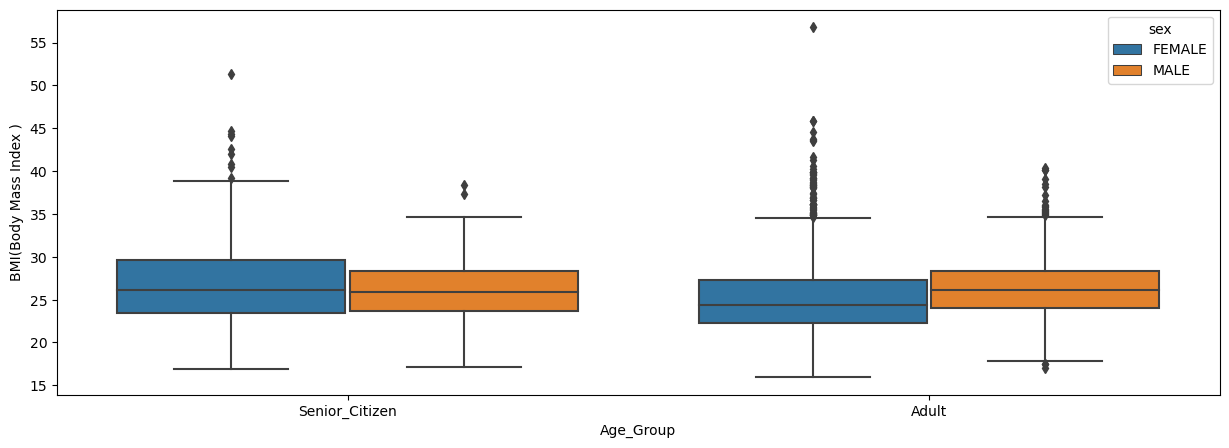

In [18]:
# Data Visualization
plt.figure(figsize=(15,5))
sns.boxplot(x=CVD["Age_Group"],y=CVD["BMI(Body Mass Index )"],hue = CVD["sex"])

In [19]:
#Box plot for Continious variable
def boxplot(df,col):
    #sns.boxplot(column=[col])
    sns.boxplot(df[col],color="red")
    plt.grid(False)
    plt.show()

In [20]:
c=["age","totChol","sysBP","diaBP","BMI(Body Mass Index )","heartRate","glucose","cigsPerDay"]

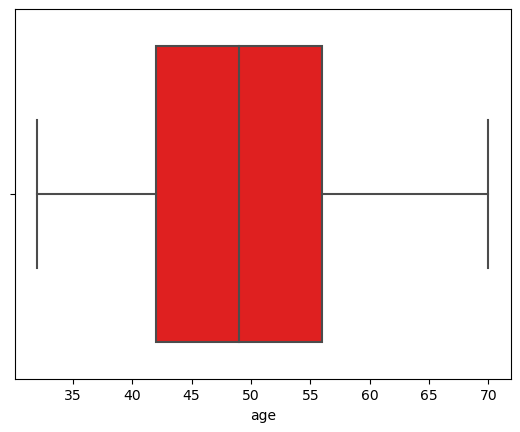

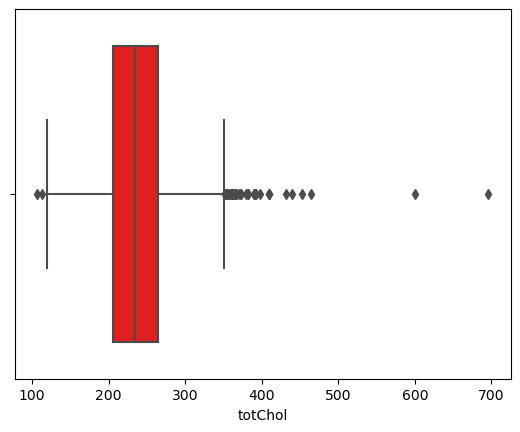

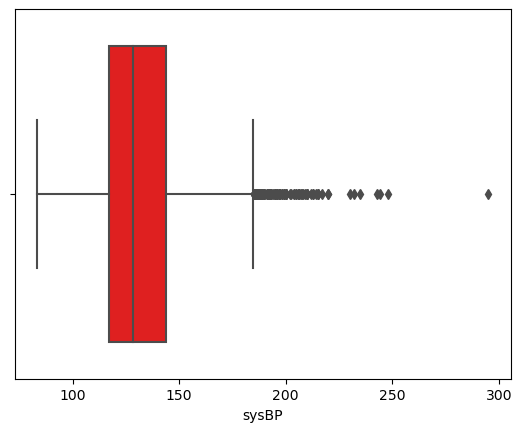

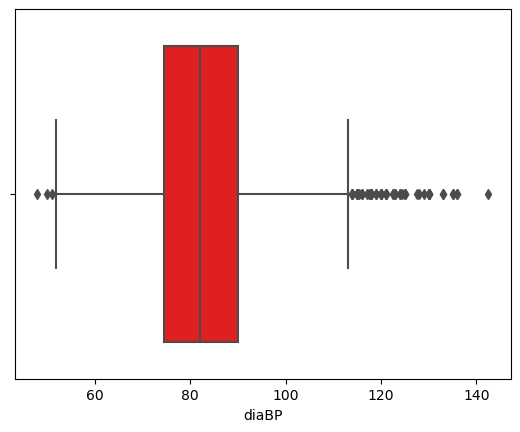

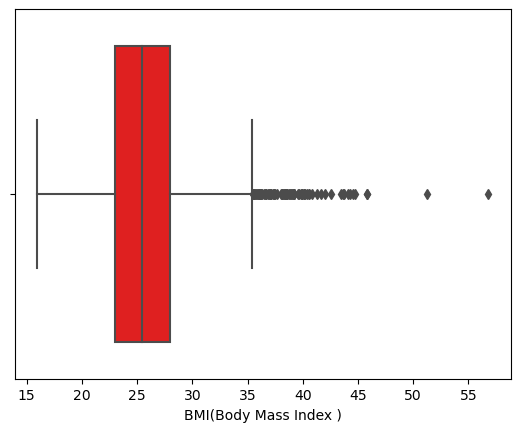

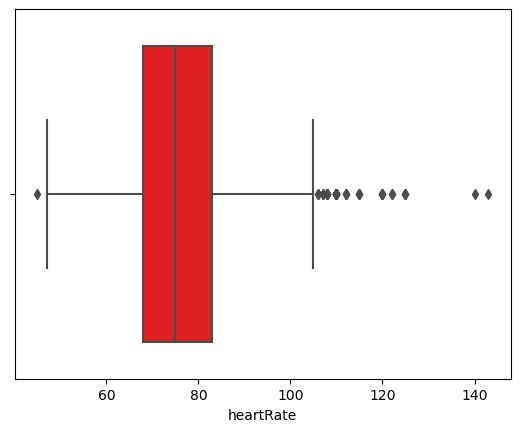

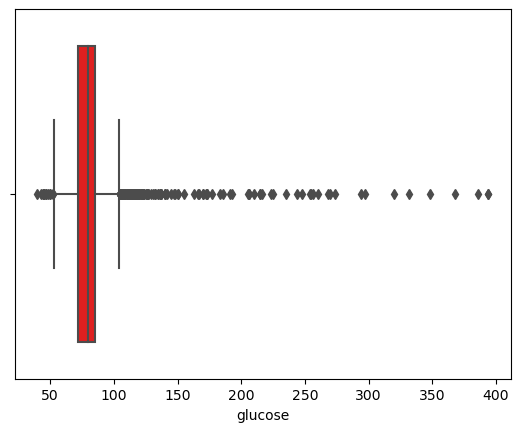

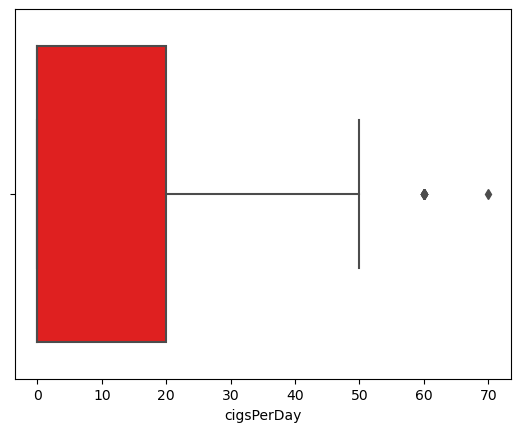

In [21]:
for i in c:
    boxplot(CVD,i)

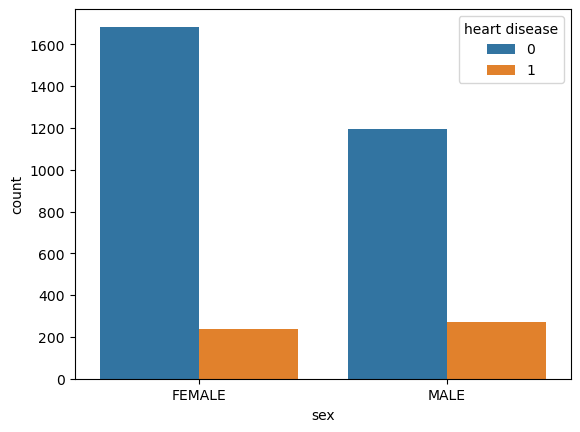

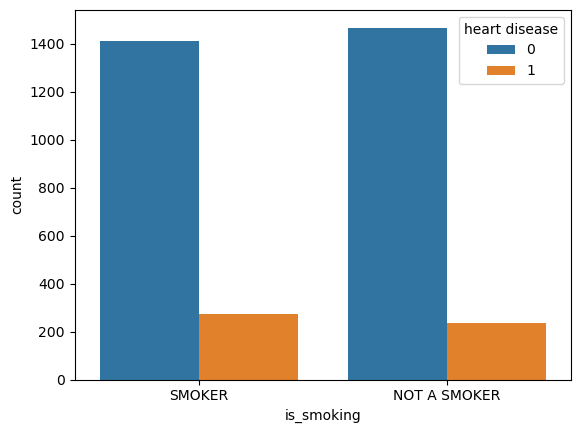

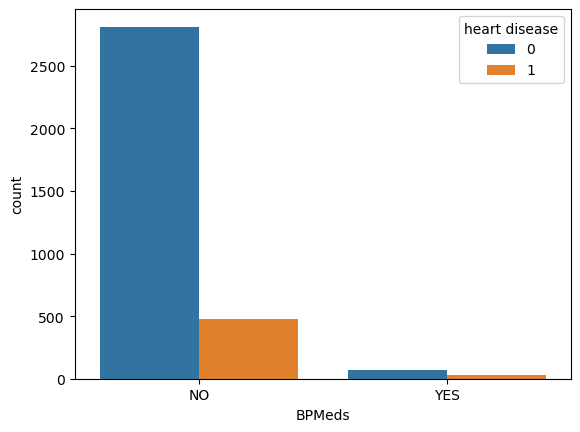

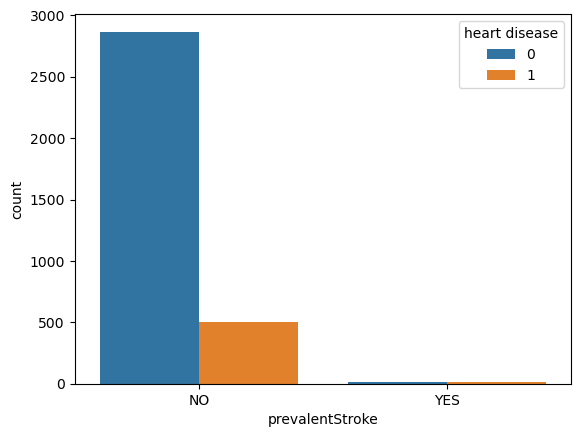

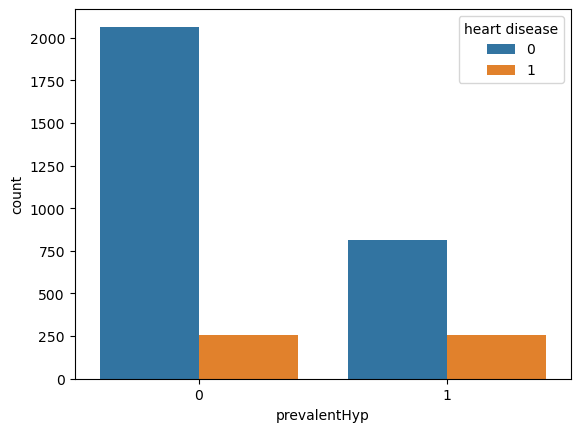

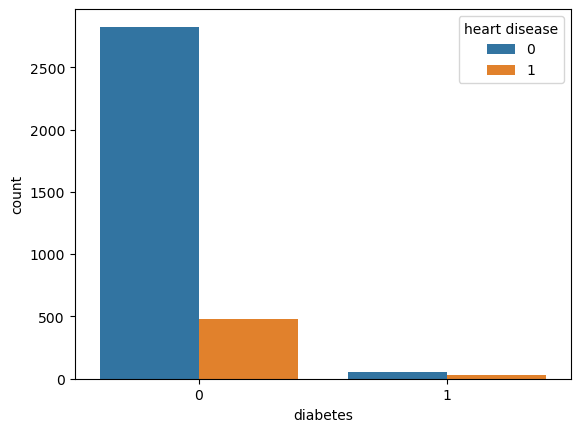

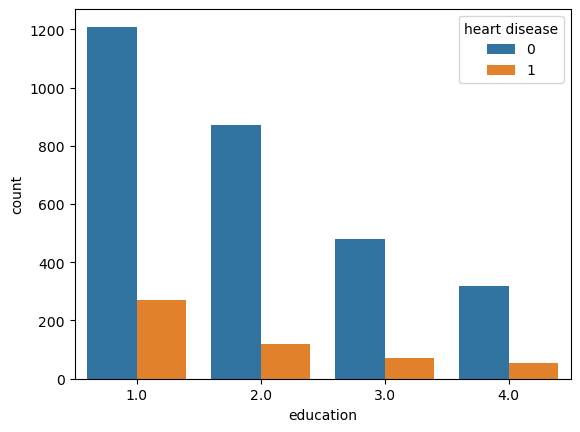

In [22]:
# Count Plot for Categorical variable
categorical = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',"education"]

for i in categorical:
    sns.countplot(CVD[i], hue = CVD['heart disease'])
    plt.show()

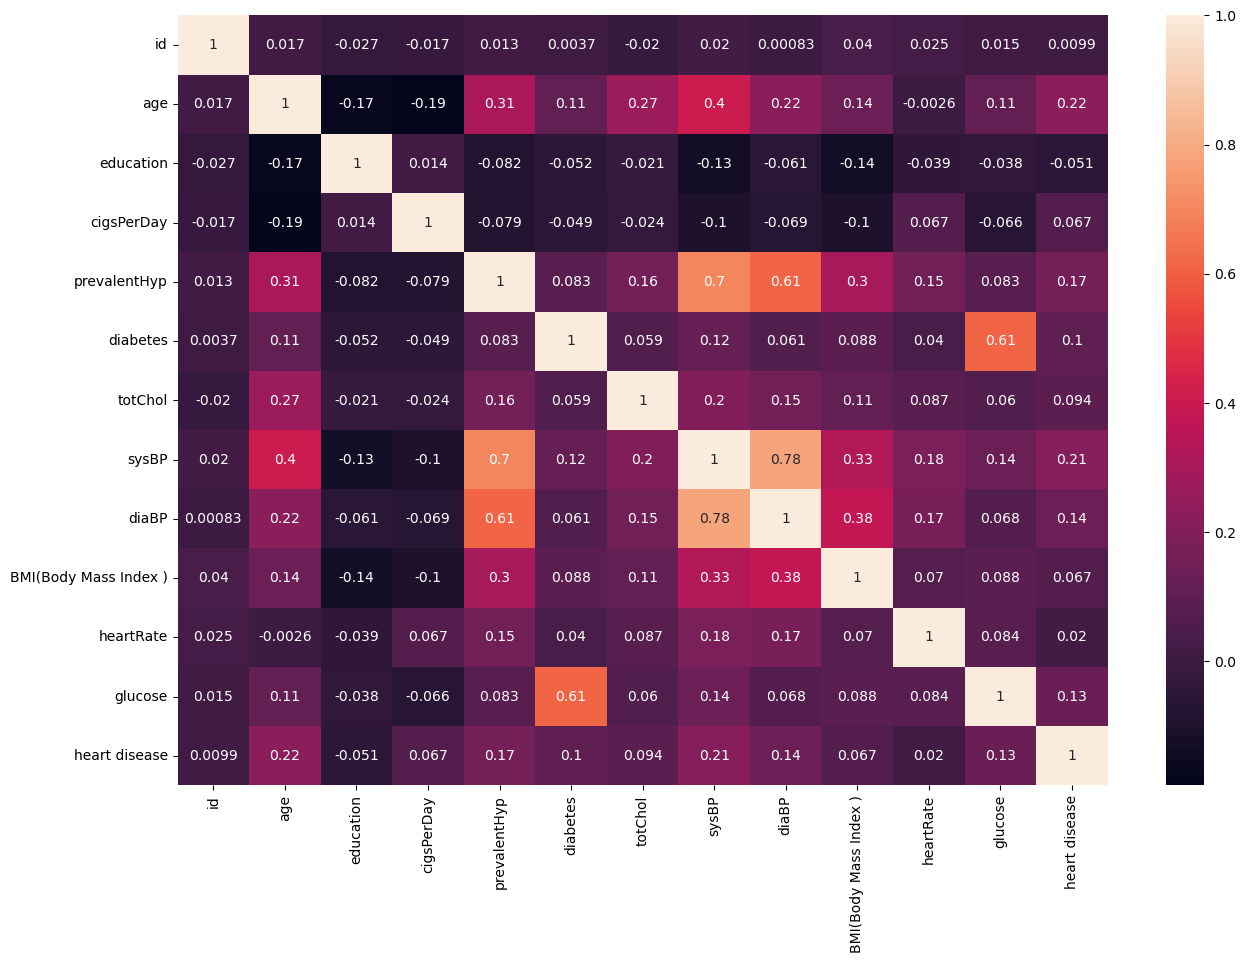

In [23]:
# HeatMap
plt.figure(figsize = (15,10))
sns.heatmap(CVD.corr(),annot = True)
plt.show()

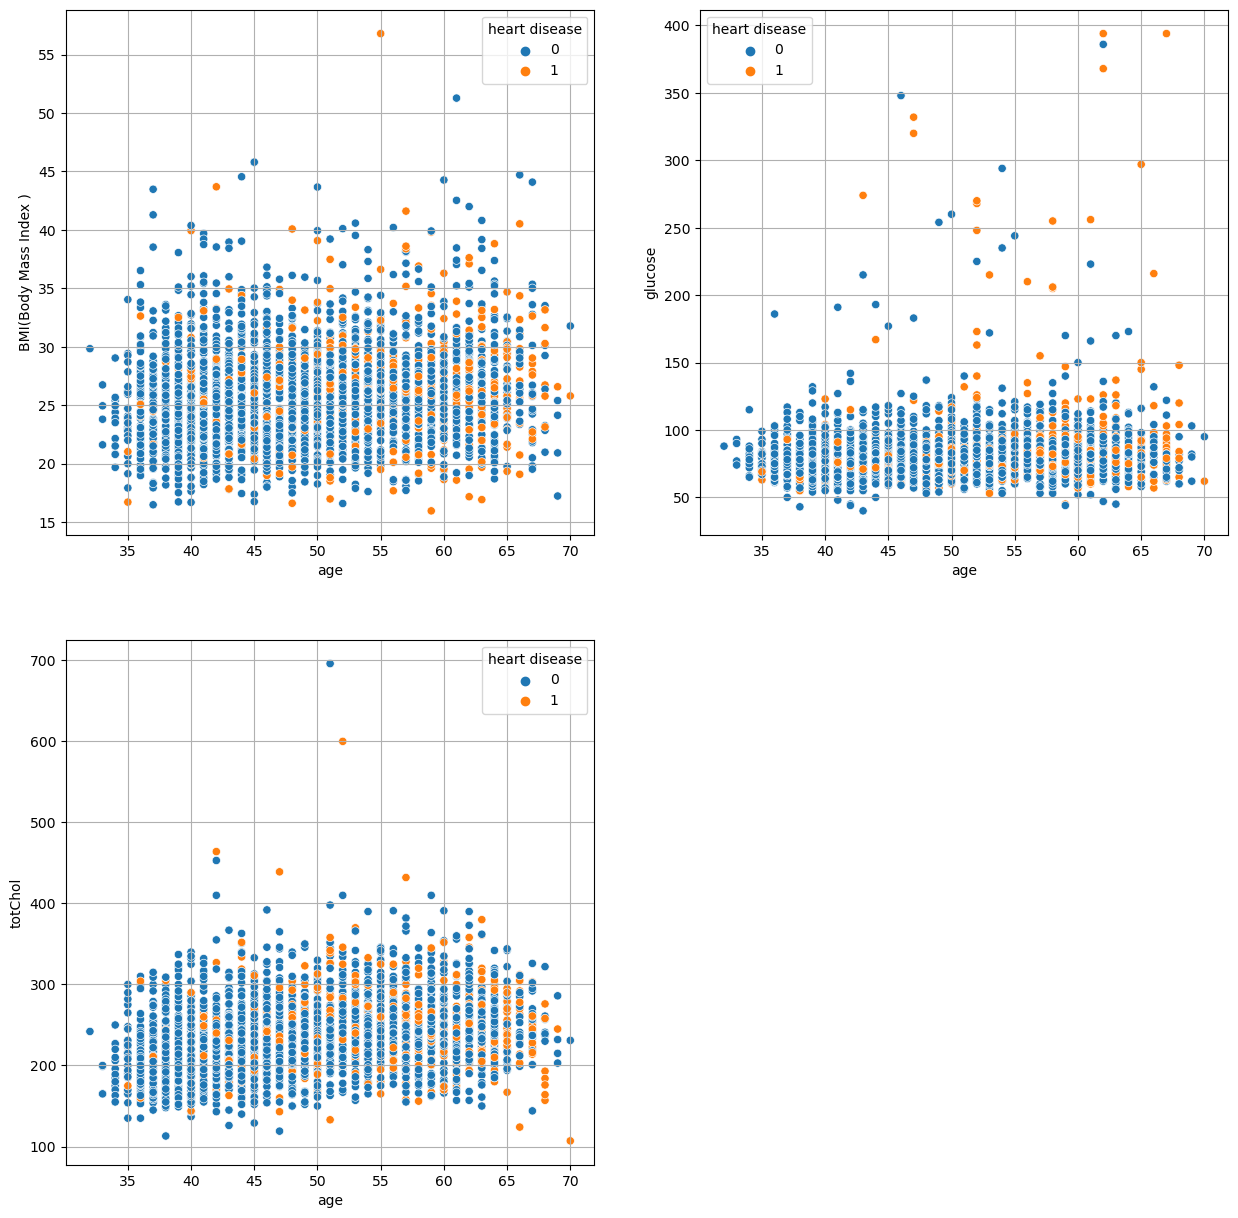

In [24]:
# two Continous Variable
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(data=CVD,x='age',y='BMI(Body Mass Index )',hue='heart disease')
plt.plot()
plt.grid(True)
plt.subplot(2,2,2)
sns.scatterplot(data=CVD,x='age',y='glucose',hue='heart disease')
plt.plot()
plt.grid(True)
plt.subplot(2,2,3)
sns.scatterplot(data=CVD,x='age',y='totChol',hue='heart disease')
plt.plot()
plt.grid(True)

plt.savefig('cont_vs_cont_variable')

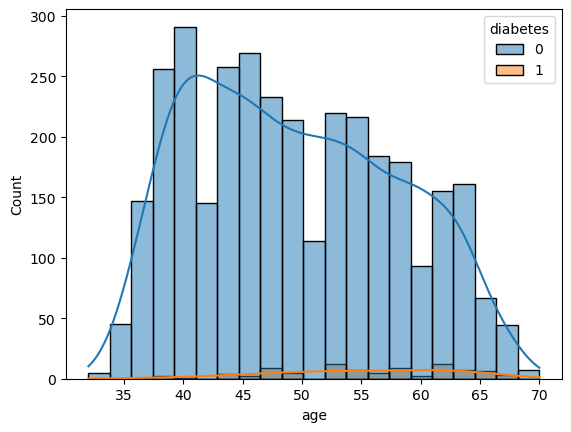

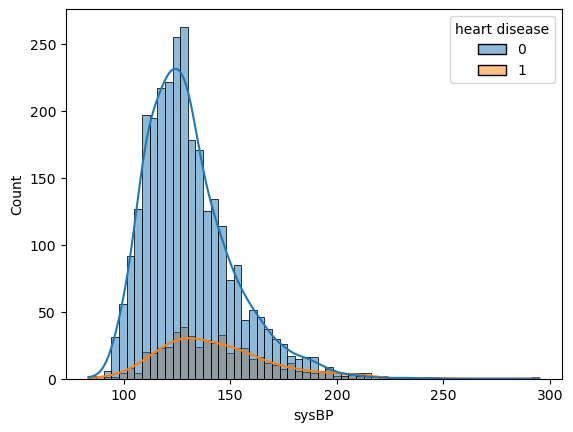

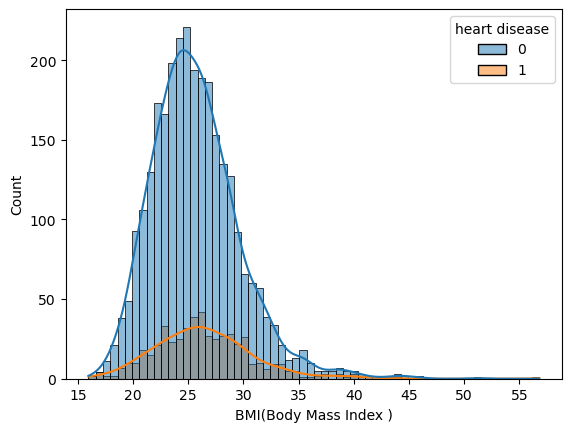

In [25]:
# one contimuos and one categorical - barplot
sns.histplot(data=CVD,x='age',hue='diabetes',alpha = 0.5,kde = True)
plt.savefig('age vs diabetes')
plt.show()

sns.histplot(data=CVD,x='sysBP',hue='heart disease',alpha = 0.5,kde = True)
plt.savefig('systolic BP Vs heartDisease')
plt.show()

sns.histplot(data=CVD,x='BMI(Body Mass Index )',hue='heart disease',alpha = 0.5,kde = True)
plt.savefig('Body Mass Index Vs heartDisease')
plt.show()



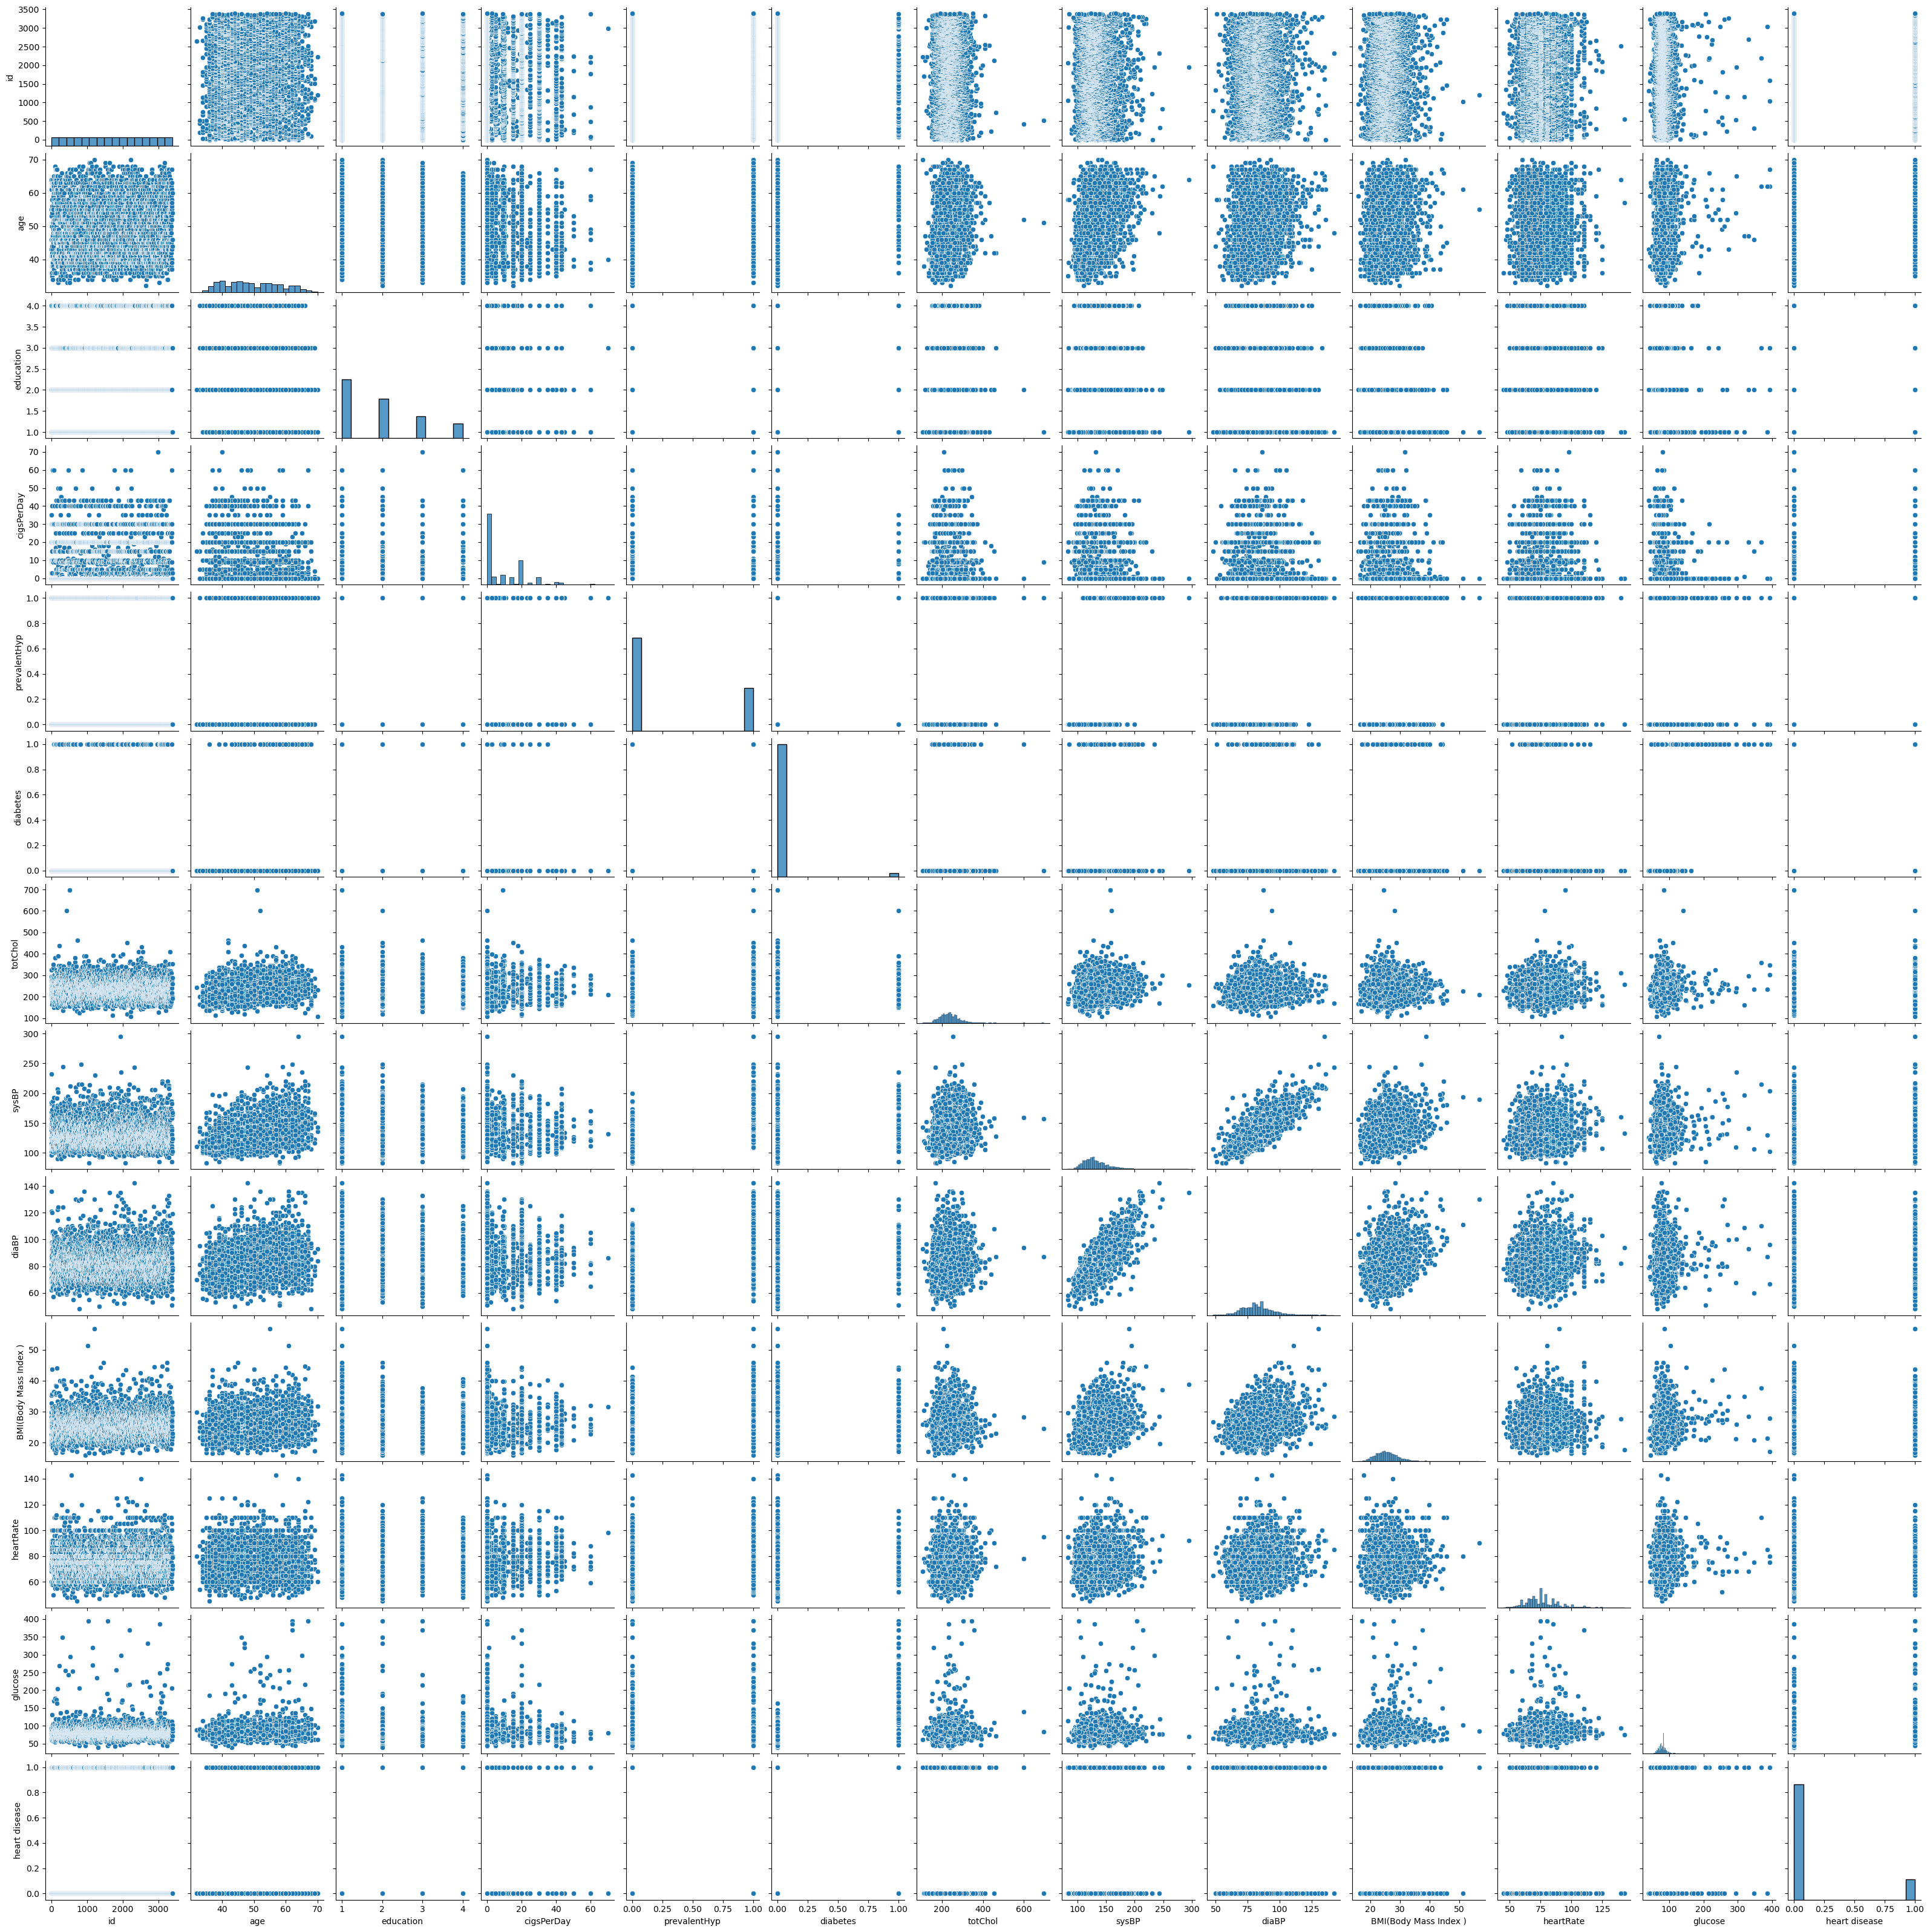

In [26]:
# Pair plot
sns.pairplot(CVD)
plt.grid(True)

In [27]:
# Feature engineering 
CVD.head()

id  age  education     sex    is_smoking  cigsPerDay BPMeds  \
0   0   64        2.0  FEMALE        SMOKER         3.0     NO   
1   1   36        4.0    MALE  NOT A SMOKER         0.0     NO   
2   2   46        1.0  FEMALE        SMOKER        10.0     NO   
3   3   50        1.0    MALE        SMOKER        20.0     NO   
4   4   64        1.0  FEMALE        SMOKER        30.0     NO   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  \
0              NO             0         0    221.0  148.0   85.0   
1              NO             1         0    212.0  168.0   98.0   
2              NO             0         0    250.0  116.0   71.0   
3              NO             1         0    233.0  158.0   88.0   
4              NO             0         0    241.0  136.5   85.0   

   BMI(Body Mass Index )  heartRate  glucose  heart disease       Age_Group  
0              25.794964       90.0     80.0              1  Senior_Citizen  
1              29.770000       72.0     75.0              0           Adult  
2              20.350000       88.0     94.0              0           Adult  
3              28.260000       68.0     94.0              1           Adult  
4              26.420000       70.0     77.0              0  Senior_Citizen

In [28]:
CVD=CVD.drop(['id','Age_Group'],axis=1)
CVD.head()

age  education     sex    is_smoking  cigsPerDay BPMeds prevalentStroke  \
0   64        2.0  FEMALE        SMOKER         3.0     NO              NO   
1   36        4.0    MALE  NOT A SMOKER         0.0     NO              NO   
2   46        1.0  FEMALE        SMOKER        10.0     NO              NO   
3   50        1.0    MALE        SMOKER        20.0     NO              NO   
4   64        1.0  FEMALE        SMOKER        30.0     NO              NO   

   prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI(Body Mass Index )  \
0             0         0    221.0  148.0   85.0              25.794964   
1             1         0    212.0  168.0   98.0              29.770000   
2             0         0    250.0  116.0   71.0              20.350000   
3             1         0    233.0  158.0   88.0              28.260000   
4             0         0    241.0  136.5   85.0              26.420000   

   heartRate  glucose  heart disease  
0       90.0     80.0              1  
1       72.0     75.0              0  
2       88.0     94.0              0  
3       68.0     94.0              1  
4       70.0     77.0              0

In [29]:
CVD.shape

(3390, 16)

In [30]:
# changeing the categorical variable with dummys
categorical = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',"education"]

dummies=pd.get_dummies(CVD[['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',"education"]], drop_first=True)

dummies

prevalentHyp  diabetes  education  sex_MALE  is_smoking_SMOKER  \
0                0         0        2.0         0                  1   
1                1         0        4.0         1                  0   
2                0         0        1.0         0                  1   
3                1         0        1.0         1                  1   
4                0         0        1.0         0                  1   
...            ...       ...        ...       ...                ...   
3385             0         0        1.0         0                  0   
3386             0         0        1.0         0                  0   
3387             1         0        3.0         1                  1   
3388             1         0        1.0         1                  0   
3389             0         0        3.0         0                  0   

      BPMeds_YES  prevalentStroke_YES  
0              0                    0  
1              0                    0  
2              0                    0  
3              0                    0  
4              0                    0  
...          ...                  ...  
3385           0                    0  
3386           0                    0  
3387           0                    0  
3388           0                    0  
3389           0                    0  

[3390 rows x 7 columns]

In [31]:
CVD = pd.concat([CVD, dummies], axis=1)

In [32]:
CVD.head()

age  education     sex    is_smoking  cigsPerDay BPMeds prevalentStroke  \
0   64        2.0  FEMALE        SMOKER         3.0     NO              NO   
1   36        4.0    MALE  NOT A SMOKER         0.0     NO              NO   
2   46        1.0  FEMALE        SMOKER        10.0     NO              NO   
3   50        1.0    MALE        SMOKER        20.0     NO              NO   
4   64        1.0  FEMALE        SMOKER        30.0     NO              NO   

   prevalentHyp  diabetes  totChol  ...  heartRate  glucose  heart disease  \
0             0         0    221.0  ...       90.0     80.0              1   
1             1         0    212.0  ...       72.0     75.0              0   
2             0         0    250.0  ...       88.0     94.0              0   
3             1         0    233.0  ...       68.0     94.0              1   
4             0         0    241.0  ...       70.0     77.0              0   

   prevalentHyp  diabetes  education  sex_MALE  is_smoking_SMOKER  BPMeds_YES  \
0             0         0        2.0         0                  1           0   
1             1         0        4.0         1                  0           0   
2             0         0        1.0         0                  1           0   
3             1         0        1.0         1                  1           0   
4             0         0        1.0         0                  1           0   

   prevalentStroke_YES  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 23 columns]

In [33]:
CVD.drop(['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',"education"],axis=1,inplace=True)

In [34]:
CVD.shape

(3390, 13)

In [35]:
CVD.head()

age  cigsPerDay  totChol  sysBP  diaBP  BMI(Body Mass Index )  heartRate  \
0   64         3.0    221.0  148.0   85.0              25.794964       90.0   
1   36         0.0    212.0  168.0   98.0              29.770000       72.0   
2   46        10.0    250.0  116.0   71.0              20.350000       88.0   
3   50        20.0    233.0  158.0   88.0              28.260000       68.0   
4   64        30.0    241.0  136.5   85.0              26.420000       70.0   

   glucose  heart disease  sex_MALE  is_smoking_SMOKER  BPMeds_YES  \
0     80.0              1         0                  1           0   
1     75.0              0         1                  0           0   
2     94.0              0         0                  1           0   
3     94.0              1         1                  1           0   
4     77.0              0         0                  1           0   

   prevalentStroke_YES  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [36]:
#sampling method
CVD["heart disease"].value_counts()

0    2879
1     511
Name: heart disease, dtype: int64

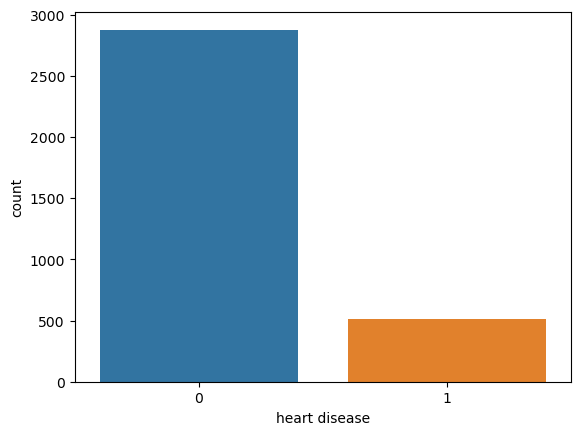

In [37]:
sns.countplot(x=CVD["heart disease"])
plt.show()

 #### 0 - Healthy
 ####  1 - HeartDisease
### As you can see that there is huge imbalance in the dataset
#### This oversampling happens based on KNN algorithm who tries to create the new neighbours based on existing neighbour in minority class


class 0: (2879, 13)
class 1: (511, 13)
total values of 1 and 0: 0    2879
1    2879
Name: heart disease, dtype: int64


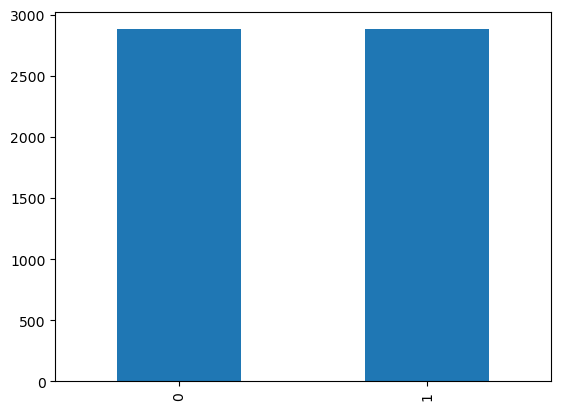

In [38]:
class_count_0, class_count_1 = CVD["heart disease"].value_counts()
# Separate class
class_0 = CVD[CVD["heart disease"] == 0]
class_1 = CVD[CVD["heart disease"] == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
    
class_1_over = class_1.sample(class_count_0, replace=True)
CVD = pd.concat([class_0,class_1_over], axis=0)

print("total values of 1 and 0:",CVD["heart disease"].value_counts())

CVD["heart disease"].value_counts().plot(kind='bar')
plt.show()

### Machine Learning Algorithm

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = CVD.drop(['heart disease'], axis=1)

X.head()

age  cigsPerDay  totChol  sysBP  diaBP  BMI(Body Mass Index )  heartRate  \
1   36         0.0    212.0  168.0   98.0                  29.77       72.0   
2   46        10.0    250.0  116.0   71.0                  20.35       88.0   
4   64        30.0    241.0  136.5   85.0                  26.42       70.0   
6   61         0.0    238.0  232.0  136.0                  24.83       75.0   
7   36        35.0    295.0  102.0   68.0                  28.15       60.0   

   glucose  sex_MALE  is_smoking_SMOKER  BPMeds_YES  prevalentStroke_YES  
1     75.0         1                  0           0                    0  
2     94.0         0                  1           0                    0  
4     77.0         0                  1           0                    0  
6     79.0         1                  0           0                    0  
7     63.0         1                  1           0                    0

In [41]:
y = CVD['heart disease']

y.head()

1    0
2    0
4    0
6    0
7    0
Name: heart disease, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3,random_state = 100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4030, 12), (4030,), (1728, 12), (1728,))

In [43]:
X_train.head()

age  cigsPerDay  totChol  sysBP  diaBP  BMI(Body Mass Index )  \
2262   57         0.0    300.0  121.0   74.0                  28.09   
2130   59         0.0    267.0  190.0   90.0                  26.23   
190    46         7.0    280.0  202.0  124.0                  28.06   
408    47         0.0    270.0  152.5  108.0                  26.09   
1039   40        25.0    335.0  136.5   84.0                  23.60   

      heartRate    glucose  sex_MALE  is_smoking_SMOKER  BPMeds_YES  \
2262       80.0  155.00000         1                  0           0   
2130       75.0   82.08652         0                  0           0   
190        66.0   63.00000         0                  1           1   
408        90.0   88.00000         1                  0           0   
1039       85.0   76.00000         1                  1           0   

      prevalentStroke_YES  
2262                    0  
2130                    0  
190                     0  
408                     0  
1039                    0

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()
X_train[['age','cigsPerDay','totChol','sysBP','diaBP','BMI(Body Mass Index )','heartRate','glucose']] = scaler.fit_transform(X_train[['age','cigsPerDay','totChol','sysBP','diaBP','BMI(Body Mass Index )','heartRate','glucose']])
X_train.head()

age  cigsPerDay   totChol     sysBP     diaBP  \
2262  0.657895    0.000000  0.327674  0.177305  0.275132   
2130  0.710526    0.000000  0.271647  0.503546  0.444444   
190   0.368421    0.100000  0.293718  0.560284  0.804233   
408   0.394737    0.000000  0.276740  0.326241  0.634921   
1039  0.210526    0.357143  0.387097  0.250591  0.380952   

      BMI(Body Mass Index )  heartRate   glucose  sex_MALE  is_smoking_SMOKER  \
2262               0.297013   0.368421  0.324859         1                  0   
2130               0.251469   0.315789  0.118888         0                  0   
190                0.296278   0.221053  0.064972         0                  1   
408                0.248041   0.473684  0.135593         1                  0   
1039               0.187071   0.421053  0.101695         1                  1   

      BPMeds_YES  prevalentStroke_YES  
2262           0                    0  
2130           0                    0  
190            1                    0  
408            0                    0  
1039           0                    0

In [46]:
X_test[['age','cigsPerDay','totChol','sysBP','diaBP','BMI(Body Mass Index )','heartRate','glucose']] = scaler.fit_transform(X_test[['age','cigsPerDay','totChol','sysBP','diaBP','BMI(Body Mass Index )','heartRate','glucose']])
X_test.head()

age  cigsPerDay   totChol     sysBP     diaBP  \
1762  0.277778    0.666667  0.260504  0.172577  0.367816   
143   0.583333    0.000000  0.420168  0.229314  0.379310   
718   0.444444    0.000000  0.327731  0.309693  0.482759   
1467  0.416667    0.151158  0.406162  0.186761  0.241379   
3349  0.333333    0.000000  0.378151  0.215130  0.425287   

      BMI(Body Mass Index )  heartRate   glucose  sex_MALE  is_smoking_SMOKER  \
1762               0.538435   0.210526  0.085714         1                  1   
143                0.401043   0.126316  0.120000         0                  0   
718                0.486261   0.547368  0.117143         0                  0   
1467               0.190957   0.252632  0.128571         0                  1   
3349               0.397913   0.336842  0.108819         0                  0   

      BPMeds_YES  prevalentStroke_YES  
1762           0                    0  
143            0                    0  
718            0                    0  
1467           0                    0  
3349           0                    0

## Logistics Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       893
           1       0.64      0.74      0.69       835

    accuracy                           0.67      1728
   macro avg       0.68      0.68      0.67      1728
weighted avg       0.68      0.67      0.67      1728



In [71]:
print(confusion_matrix(y_test,lr_pred))

[[548 345]
 [220 615]]


<AxesSubplot:>

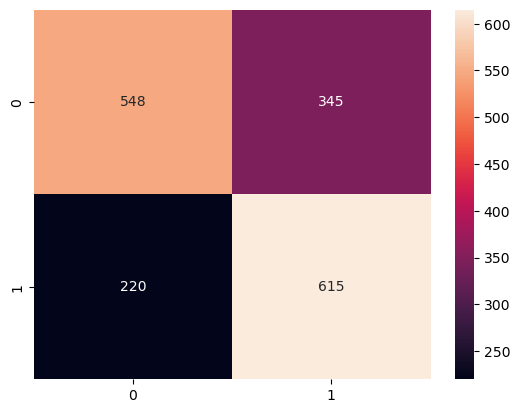

In [72]:
sns.heatmap(confusion_matrix(y_test,lr_pred), annot = True, fmt = "d")

In [73]:
metrics_calculation(y_test,lr_pred)

Confusion Matrix:
 [[548 345]
 [220 615]]
Accuracy : [0.67303241]
Sensitivity : [0.71354167]
Specificity : [0.640625]
Precision: [0.61366181]
Recall: [0.71354167]
F-score: [0.65984347]


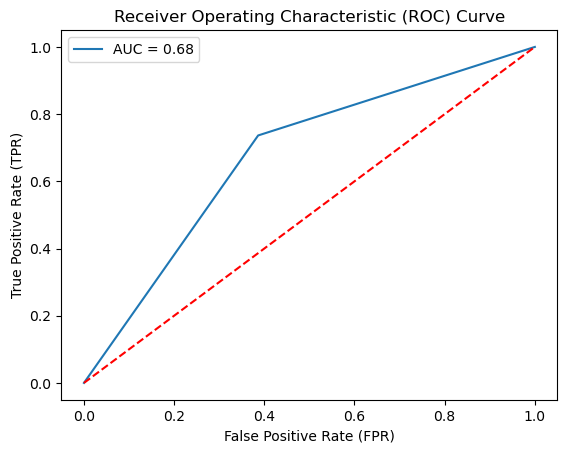

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,lr_pred)

auc_score = roc_auc_score(y_test,lr_pred)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree = DecisionTreeClassifier()

In [53]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
predictions = dtree.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.80      0.67       893
           1       0.64      0.37      0.47       835

    accuracy                           0.59      1728
   macro avg       0.61      0.59      0.57      1728
weighted avg       0.61      0.59      0.57      1728



In [57]:
print(confusion_matrix(y_test,predictions))

[[714 179]
 [523 312]]


<AxesSubplot:>

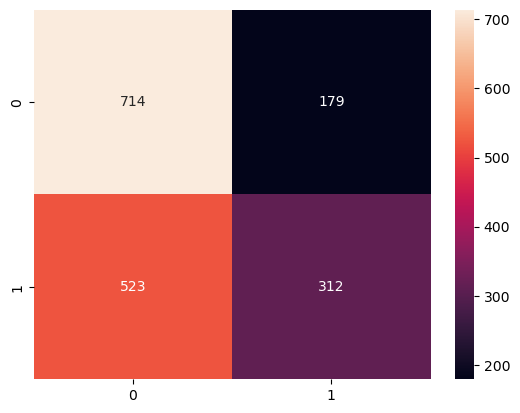

In [58]:
sns.heatmap(confusion_matrix(y_test,predictions), annot = True, fmt = "d")

### Calculating Accuracy
#### Accuracy= TP+TN/Total observation
#### Accuracy= 753+830/573+140+5+830 = 1583/1728 = 0.916 = 91%

In [59]:
def metrics_calculation(y_testing,pred):
    confusion_mat = confusion_matrix(y_testing, pred)
    TP = confusion_mat[0,0:1]
    FP = confusion_mat[0,1:2]
    FN = confusion_mat[1,0:1]
    TN = confusion_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    
    print("Confusion Matrix:\n",confusion_mat)
    print("Accuracy :",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)


In [60]:
metrics_calculation(y_test,predictions)

Confusion Matrix:
 [[714 179]
 [523 312]]
Accuracy : [0.59375]
Sensitivity : [0.57720291]
Specificity : [0.63543788]
Precision: [0.79955207]
Recall: [0.57720291]
F-score: [0.67042254]


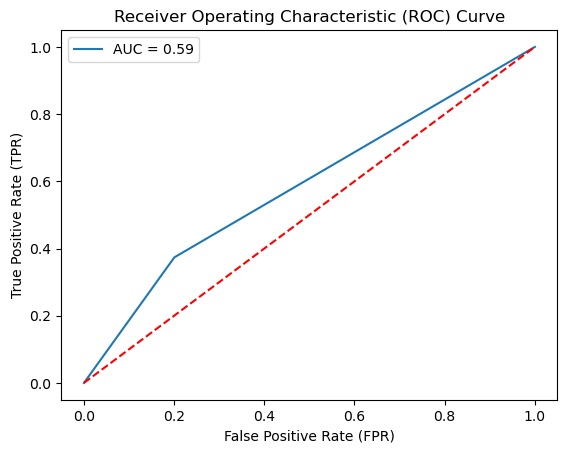

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,predictions)

auc_score = roc_auc_score(y_test,predictions)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=100)
randomfc.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
randomfc_pred = randomfc.predict(X_test)

In [64]:
print(confusion_matrix(y_test,randomfc_pred ))

[[833  60]
 [534 301]]


In [65]:
print(classification_report(y_test,randomfc_pred))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74       893
           1       0.83      0.36      0.50       835

    accuracy                           0.66      1728
   macro avg       0.72      0.65      0.62      1728
weighted avg       0.72      0.66      0.62      1728



<AxesSubplot:>

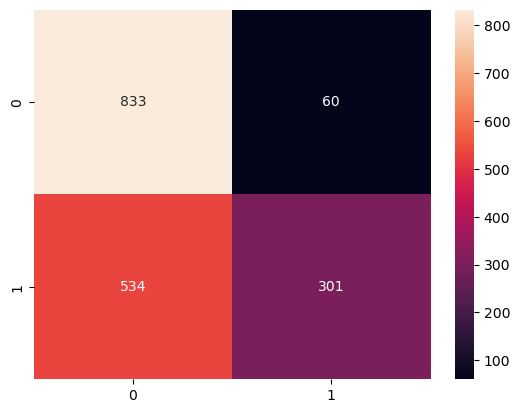

In [66]:
sns.heatmap(confusion_matrix(y_test,randomfc_pred), annot = True, fmt = "d")

In [67]:
metrics_calculation(y_test,randomfc_pred)

Confusion Matrix:
 [[833  60]
 [534 301]]
Accuracy : [0.65625]
Sensitivity : [0.60936357]
Specificity : [0.83379501]
Precision: [0.93281075]
Recall: [0.60936357]
F-score: [0.73716814]


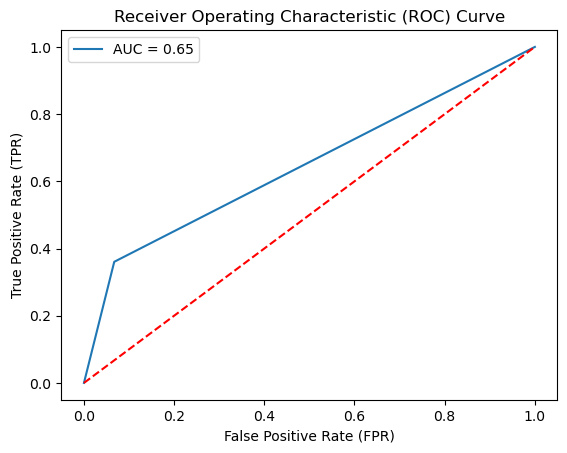

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,randomfc_pred)

auc_score = roc_auc_score(y_test,randomfc_pred)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## Support Vector Machine

In [75]:
from sklearn.svm import SVC

In [76]:
svc = SVC()

In [77]:
svc.fit(X_train, y_train)

SVC()

In [78]:
y_pred_svc = svc.predict(X_test)

In [79]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[534, 359],
       [210, 625]], dtype=int64)

In [80]:
metrics_calculation(y_test, y_pred_svc)

Confusion Matrix:
 [[534 359]
 [210 625]]
Accuracy : [0.67071759]
Sensitivity : [0.71774194]
Specificity : [0.6351626]
Precision: [0.59798432]
Recall: [0.71774194]
F-score: [0.65241295]


<AxesSubplot:>

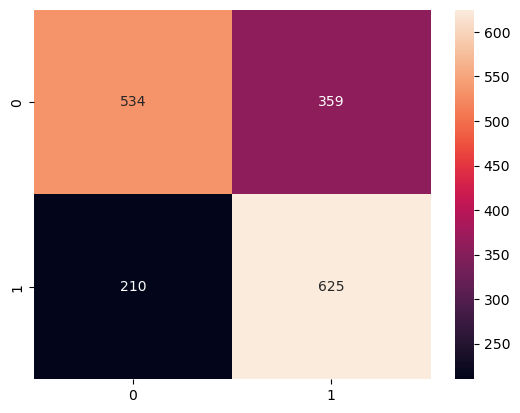

In [81]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot = True, fmt = "d")

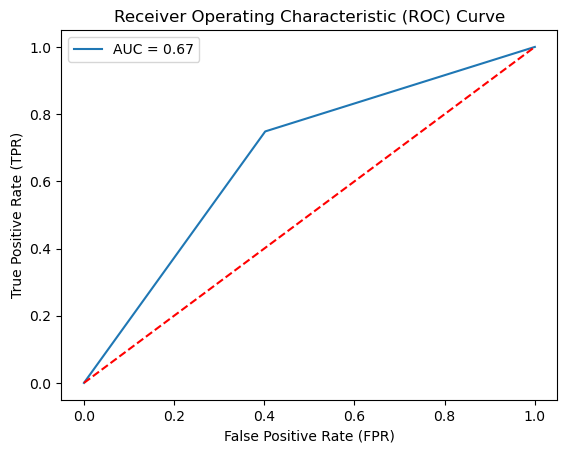

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,y_pred_svc)

auc_score = roc_auc_score(y_test,y_pred_svc)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## K Nearest Neigbhour

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier()

In [85]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred_knn = knn.predict(X_test)

In [87]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[563, 330],
       [170, 665]], dtype=int64)

In [88]:
metrics_calculation(y_test, y_pred_knn)

Confusion Matrix:
 [[563 330]
 [170 665]]
Accuracy : [0.71064815]
Sensitivity : [0.7680764]
Specificity : [0.66834171]
Precision: [0.63045913]
Recall: [0.7680764]
F-score: [0.69249692]


<AxesSubplot:>

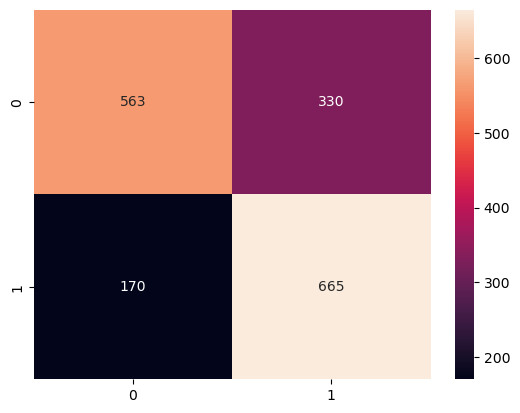

In [89]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot = True, fmt = "d")

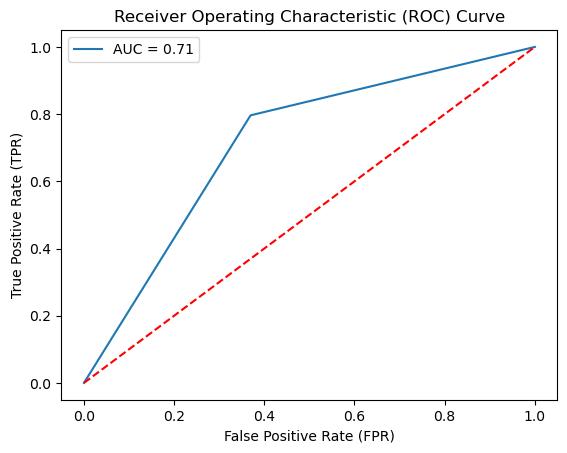

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,y_pred_knn)

auc_score = roc_auc_score(y_test,y_pred_knn)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## Comparing the Algorithms For Accuracy Findings

In [91]:
data={"Algorithm":["DecisonTree","RandomForest","LogisticReg","KNN","SVM"],"Accuracy":[91,95,67,69,78]}

In [92]:
df=pd.DataFrame(data)

In [93]:
df

Algorithm  Accuracy
0   DecisonTree        91
1  RandomForest        95
2   LogisticReg        67
3           KNN        69
4           SVM        78

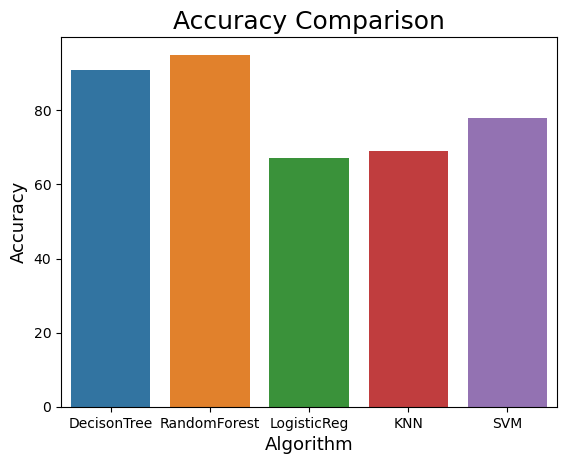

In [94]:
ax=sns.barplot(x=df["Algorithm"],y=df["Accuracy"])
ax.set_xlabel("Algorithm",size=13)
ax.set_ylabel("Accuracy",size=13)
plt.title("Accuracy Comparison",size=18)
plt.show()